In [1]:
## Import libraries necessary for monitor data processing. ##
## Code reference:https://github.com/stanfordnqp/spins-b 
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from spins.invdes.problem_graph import log_tools

In [2]:
## Define filenames. ##
# `save_folder` is the full path to the directory containing the Pickle (.pkl) log files from the optimization.
save_folder = os.getcwd()
## Load the logged monitor data and monitor spec information. ##

# `df` is a pandas dataframe containing all the data loaded from the log Pickle (.pkl) files.
view_filename = os.path.join(save_folder, "trained_data")
df = log_tools.create_log_data_frame(log_tools.load_all_logs(view_filename))

In [3]:
# `monitor_spec_filename` is the full path to the monitor spec yml file.
monitor_spec_filename = os.path.join(save_folder, "monitor_spec.yml")
print(monitor_spec_filename)
# `monitor_descriptions` now contains the information from the monitor_spec.yml file. It follows the format of
# the schema found in `log_tools.monitor_spec`.
monitor_descriptions = log_tools.load_from_yml(monitor_spec_filename)

/home/gaoucsd/anaconda3/envs/ece228/14W/main/monitor_spec.yml


## Visualize training results

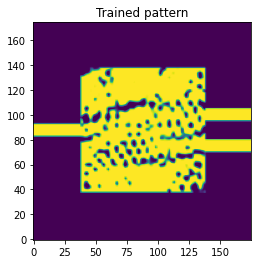

In [4]:

field_data = log_tools.get_single_monitor_data(df, "epsilon")
field_mag = log_tools.process_field(field_data, vector_operation="magnitude")

## Manually plot this 2-dimensional field data. ##
plt.figure()
plt.imshow(np.squeeze(np.array(field_mag.T)), origin="lower")
plt.title("Trained pattern")
plt.show()

## Plot the power versus iteration data and field data 

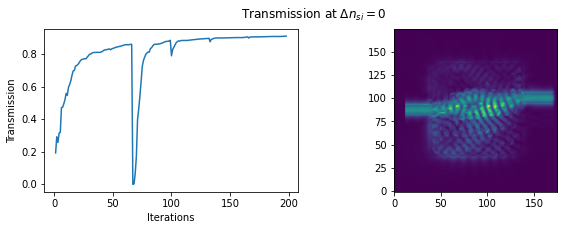

In [5]:
joined_monitor_data = log_tools.get_joined_scalar_monitors(
    df, "power21550", event_name="optimizing", scalar_operation="magnitude_squared")

iterations = joined_monitor_data.iterations
data = joined_monitor_data.data

## Manually plot the power versus iteration data we've retrieved for the monitor of interest. ##
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(iterations, data)
ax.set_xlabel("Iterations")
ax.set_ylabel("Transmission")

field_data = log_tools.get_single_monitor_data(df, "field21550")
field_mag = log_tools.process_field(field_data, vector_operation="magnitude")

## Manually plot this 2-dimensional field data. ##
ax2.imshow(np.squeeze(np.array(field_mag.T)), origin="lower")
fig.suptitle('Transmission at $\Delta n_{si} = 0$')
plt.show()

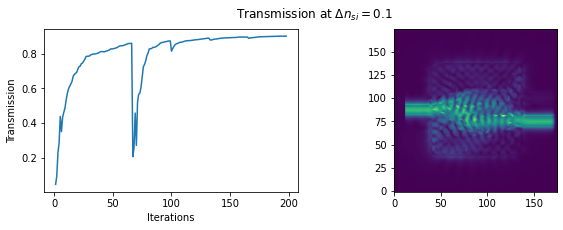

In [6]:
joined_monitor_data = log_tools.get_joined_scalar_monitors(
    df, "power1550", event_name="optimizing", scalar_operation="magnitude_squared")

iterations = joined_monitor_data.iterations
data = joined_monitor_data.data

## Manually plot the power versus iteration data we've retrieved for the monitor of interest. ##
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(iterations, data)
ax.set_xlabel("Iterations")
ax.set_ylabel("Transmission")

field_data = log_tools.get_single_monitor_data(df, "field1550")
field_mag = log_tools.process_field(field_data, vector_operation="magnitude")

## Manually plot this 2-dimensional field data. ##
ax2.imshow(np.squeeze(np.array(field_mag.T)), origin="lower")
fig.suptitle('Transmission at $\Delta n_{si} = 0.1$')
plt.show()